# 0- Introducción

## 0.1- Instalar librerías

In [1]:
!pip install pandas
!pip install scikit-plot

## 0.2- Importar Libreria

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 0.3- Cargar Datos

In [3]:
data = pd.read_csv('dataset_SCL.csv')

<ipython-input-3-9a1ffd226901>:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset_SCL.csv')


# 1- Analizar Datos


## 1.1- Esta sección tiene como objetivo entender mejor el dataset: Descripción de cada columna y cantidad de datos.

In [4]:
# Información de cantidad de datos y columnas
# Conocer los nombres y tipos de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [5]:
# Ejemplo de los datos
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [6]:
# Ejemplo de los datos
data.tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima


## 1.2- Rangos de cada columna

In [7]:
print("Rango de Fecha programadas del vuelo")
print(min(data['Fecha-I']), " y ", max(data['Fecha-I']))
print()
print("Rango de Fecha operación del vuelo")
print(min(data['Fecha-O']), " y ", max(data['Fecha-O']))

Rango de Fecha programadas del vuelo
2017-01-01 00:15:00  y  2017-12-31 23:55:00

Rango de Fecha operación del vuelo
2017-01-01 00:04:00  y  2018-01-01 00:12:00


In [8]:
print("Valores distintos de número de vuelo programado: " + str(data['Vlo-I'].nunique()))
print(data['Vlo-I'].unique())

Valores distintos de número de vuelo programado: 750
['226' '912' '940' '92' '93' '401' '11' '1011' '1281' '1283' '1285' '1287'
 '1289' '1291' '2291' '98' '116' '176' '240' '295' '689' '250' '112' '118'
 '174' '249' '276' '495' '4495' '146' '7661' '7663' '9245' '9268' '9362'
 '6830' '702' '624' '28' '846' '709' '741' '8021' '8023' '8027' '8029'
 '8069' '8073' '8075' '8099' '8125' '8137' '8160' '8161' '9601' '9615'
 '9651' '9653' '9661' '9689' '9782' '9623' '1' '3' '7' '9' '13' '15' '17'
 '21' '23' '25' '41' '43' '51' '53' '55' '61' '71' '73' '75' '81' '83'
 '102' '104' '106' '108' '110' '120' '122' '128' '130' '132' '134' '140'
 '142' '150' '156' '160' '162' '164' '166' '170' '172' '180' '182' '184'
 '186' '188' '190' '192' '194' '196' '501' '503' '507' '521' '531' '551'
 '800' '802' '804' '1083' '14' '31' '35' '37' '57' '65' '67' '69' '89'
 '91' '97' '114' '124' '126' '136' '138' '144' '148' '152' '154' '168'
 '178' '201' '203' '207' '209' '211' '213' '215' '217' '219' '221' '231'
 '2

In [9]:
print("Valores distintos de número de vuelo de operación: ", str(data['Vlo-O'].nunique()))
print(data['Vlo-O'].unique())

Valores distintos de número de vuelo de operación:  866
['226' '912' '940' '92' '93' '401' '11' '1011' '1281' '1283' '1285' '1287'
 '1289' '1291' '2291' '98' '116' '176' '240' '295' '689' '250' '112' '118'
 '174' '249' '276' '495' '4495' '146' '7661' '7663' '9245' '9268' '9362'
 '6830' '702' '624' '28' '846' '709' '741' '8021' '8023' '8027' '8029'
 '8069' '8073' '8075' '8099' '8125' '8137' '8160' '8161' '9601' '9615'
 '9651' '9653' '9661' '9689' '9782' '9623' '1' '3' '7' '9' '13' '15' '17'
 '21' '23' '25' '41' '43' '51' '53' '55' '61' '71' '73' '75' '81' '83'
 '102' '104' '106' '108' '110' '120' '122' '128' '130' '132' '134' '140'
 '142' '150' '156' '160' '162' '164' '166' '170' '172' '180' '182' '184'
 '186' '188' '190' '192' '194' '196' '501' '503' '507' '521' '531' '551'
 '800' '802' '804' '1083' '14' '31' '35' '37' '57' '65' '67' '69' '89'
 '91' '97' '114' '124' '126' '136' '138' '144' '148' '152' '154' '168'
 '178' '201' '203' '207' '209' '211' '213' '215' '217' '219' '221' '231'


In [10]:
print("Valores distintos de códigos de ciudad de origen programado: ", str(data['Ori-I'].nunique()))
print(data['Ori-I'].unique())
print()
print("Valores distintos de códigos de ciudad de origen de operación: ", str(data['Ori-O'].nunique()))
print(data['Ori-O'].unique())

Valores distintos de códigos de ciudad de origen programado:  1
['SCEL']

Valores distintos de códigos de ciudad de origen de operación:  1
['SCEL']


In [11]:
print("Valores distintos de códigos de ciudad de destino programado: ", str(data['Des-I'].nunique()))
print(data['Des-I'].unique())
print()
print("Valores distintos de códigos de ciudad de destino de operación: ", str(data['Des-O'].nunique()))
print(data['Des-O'].unique())

Valores distintos de códigos de ciudad de destino programado:  64
['KMIA' 'KDFW' 'SAEZ' 'CYYZ' 'LFPG' 'MMMX' 'SABE' 'SKBO' 'LIRF' 'EGLL'
 'MPTO' 'KATL' 'SBGR' 'SBGL' 'SBFL' 'LEMD' 'SPJC' 'YSSY' 'KIAH' 'SGAS'
 'SBFI' 'SCTE' 'SCCI' 'SCNT' 'SCBA' 'SCVD' 'SCQP' 'SCIE' 'SCSE' 'SCAT'
 'SCCF' 'SCFA' 'SCDA' 'SCAR' 'SAME' 'SACO' 'SUMU' 'SCPQ' 'SCJO' 'KMCO'
 'KJFK' 'SEGU' 'MMUN' 'MDPC' 'KLAX' 'NZAA' 'SCIP' 'SLLP' 'SLVR' 'SBCT'
 'SEQM' 'SAZS' 'SAAR' 'SANT' 'YMML' 'SEQU' 'SANU' 'SAZN' 'SPSO' 'SAWH'
 'EGYP' 'SULS' 'SLCB' 'SARI']

Valores distintos de códigos de ciudad de destino de operación:  63
['KMIA' 'KDFW' 'SAEZ' 'CYYZ' 'LFPG' 'MMMX' 'SABE' 'SKBO' 'LIRF' 'EGLL'
 'MPTO' 'KATL' 'SBGR' 'SBGL' 'SBFL' 'LEMD' 'SPJC' 'YSSY' 'KIAH' 'SGAS'
 'SBFI' 'SCTE' 'SCCI' 'SCNT' 'SCBA' 'SCQP' 'SCVD' 'SCIE' 'SCSE' 'SCAT'
 'SCCF' 'SCFA' 'SCDA' 'SCAR' 'SAME' 'SACO' 'SUMU' 'SCPQ' 'SCJO' 'KMCO'
 'KJFK' 'SEGU' 'MMUN' 'MDPC' 'KLAX' 'NZAA' 'SCIP' 'SLLP' 'SLVR' 'SBCT'
 'SEQM' 'SAZS' 'SAAR' 'KIAD' 'SANT' 'YMML' 'SANU' 'SAZ

In [12]:
print("Valores distintos de código aerolínea de vuelo programado: ", str(data['Emp-I'].nunique()))
print(data['Emp-I'].unique())
print()
print("Valores distintos de código aerolínea de vuelo de operación: ", str(data['Emp-O'].nunique()))
print(data['Emp-O'].unique())

Valores distintos de código aerolínea de vuelo programado:  30
['AAL' 'ACA' 'AFR' 'AMX' 'ARG' 'AUT' 'AVA' 'AZA' 'BAW' 'CMP' 'DAL' 'GLO'
 'IBE' 'KLM' 'QFU' 'UAL' 'LAP' 'TAM' 'SKU' 'LAN' 'LAW' 'JMR' 'LXP' 'LNE'
 'LPE' 'DSM' 'PUE' 'JAT' 'ONE' 'LRC']

Valores distintos de código aerolínea de vuelo de operación:  32
['AAL' 'ACA' 'AFR' 'AMX' 'ARG' 'AUT' 'AVA' 'AZA' 'BAW' 'CMP' 'DAL' 'GLO'
 'IBE' 'KLM' 'LRC' 'QFA' 'UAL' 'LAP' 'TAM' 'SKU' 'LAN' 'LXP' 'LNE' 'LPE'
 'DSM' '48O' '56R' 'JMR' 'PUE' 'JAT' 'TPU' 'ONE']


In [13]:
print("Rango de Dias: ", min(data['DIA']), " y ", max(data['DIA']))
print("Rango de Meses: ", min(data['MES']), " y ", max(data['MES']))
print("Rango de Año: ", min(data['AÑO']), " y ", max(data['AÑO']))

Rango de Dias:  1  y  31
Rango de Meses:  1  y  12
Rango de Año:  2017  y  2018


In [14]:
print("Valores distintos de día de la semana: ", str(data['DIANOM'].nunique()))
print(data['DIANOM'].unique())

Valores distintos de día de la semana:  7
['Domingo' 'Lunes' 'Martes' 'Miercoles' 'Jueves' 'Sabado' 'Viernes']


In [15]:
print("Valores distintos tipo de vuelo: ", str(data['TIPOVUELO'].nunique()))
print(data['TIPOVUELO'].unique())

Valores distintos tipo de vuelo:  2
['I' 'N']


In [16]:
print("Valores distintos nombre aerolíneas: ", str(data['OPERA'].nunique()))
print(data['OPERA'].unique())

Valores distintos nombre aerolíneas:  23
['American Airlines' 'Air Canada' 'Air France' 'Aeromexico'
 'Aerolineas Argentinas' 'Austral' 'Avianca' 'Alitalia' 'British Airways'
 'Copa Air' 'Delta Air' 'Gol Trans' 'Iberia' 'K.L.M.' 'Qantas Airways'
 'United Airlines' 'Grupo LATAM' 'Sky Airline' 'Latin American Wings'
 'Plus Ultra Lineas Aereas' 'JetSmart SPA' 'Oceanair Linhas Aereas'
 'Lacsa']


In [17]:
print("Valores distintos nombre ciudad origen: ", str(data['SIGLAORI'].nunique()))
print(data['SIGLAORI'].unique())
print()
print("Valores distintos nombre ciudad destino: ", str(data['SIGLADES'].nunique()))
print(data['SIGLADES'].unique())

Valores distintos nombre ciudad origen:  1
['Santiago']

Valores distintos nombre ciudad destino:  62
['Miami' 'Dallas' 'Buenos Aires' 'Toronto' 'Paris' 'Ciudad de Mexico'
 'Bogota' 'Roma' 'Londres' 'Ciudad de Panama' 'Atlanta' 'Sao Paulo'
 'Rio de Janeiro' 'Florianapolis' 'Madrid' 'Lima' 'Sydney' 'Houston'
 'Asuncion' 'Cataratas Iguacu' 'Puerto Montt' 'Punta Arenas'
 'Puerto Natales' 'Balmaceda' 'Temuco' 'Valdivia' 'Concepcion' 'La Serena'
 'Copiapo' 'Calama' 'Antofagasta' 'Iquique' 'Arica' 'Mendoza' 'Cordoba'
 'Montevideo' 'Castro (Chiloe)' 'Osorno' 'Orlando' 'Nueva York'
 'Guayaquil' 'Cancun' 'Punta Cana' 'Los Angeles' 'Auckland N.Z.'
 'Isla de Pascua' 'La Paz' 'Santa Cruz' 'Curitiba, Bra.' 'Quito'
 'Bariloche' 'Rosario' 'Washington' 'Tucuman' 'Melbourne' 'San Juan, Arg.'
 'Neuquen' 'Pisco, Peru' 'Ushuia' 'Puerto Stanley' 'Punta del Este'
 'Cochabamba']


## 1.3- Distribución de las variables

### Descartamos Año, al tener todo el dataset contenido en un año.

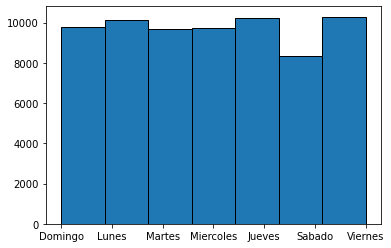

Viernes      0.150896
Jueves       0.150295
Lunes        0.148535
Domingo      0.143624
Miercoles    0.142539
Martes       0.141659
Sabado       0.122453
Name: DIANOM, dtype: float64

In [18]:
# Distribución de dia nominal
plt.hist(data['DIANOM'], data['DIANOM'].nunique(), histtype='bar', ec='black')
plt.show()
#data['DIANOM'].value_counts()
data['DIANOM'].value_counts(normalize = True)

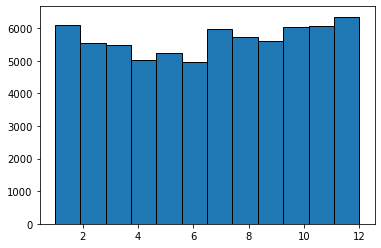

12    0.093188
1     0.089552
11    0.089142
10    0.088438
7     0.087852
8     0.084215
9     0.082251
2     0.081532
3     0.080374
5     0.076826
4     0.073601
6     0.073029
Name: MES, dtype: float64

In [19]:
# Distribución de mes
plt.hist(data['MES'], data['MES'].nunique(), histtype='bar', ec='black')
plt.show()
#data['MES'].value_counts()
data['MES'].value_counts(normalize = True)

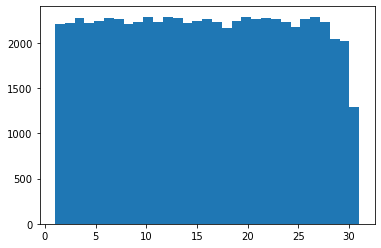

In [20]:
# Distribución de día
plt.hist(data['DIA'], data['DIA'].nunique())
plt.show()
# Es de esperarse la baja porque no todos los meses tiene 31 o el caso de febrero que no tiene 29 y 30

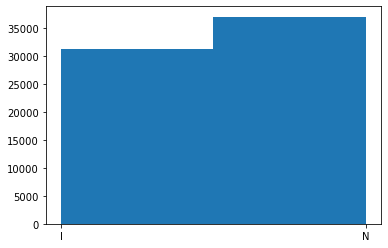

N    0.541976
I    0.458024
Name: TIPOVUELO, dtype: float64

In [21]:
# Distribución del tipo de vuelo
plt.hist(data['TIPOVUELO'], data['TIPOVUELO'].nunique())
plt.show()
#data['TIPOVUELO'].value_counts()
data['TIPOVUELO'].value_counts(normalize = True)

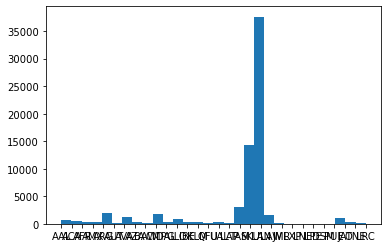

LAN    0.551432
SKU    0.209630
TAM    0.044703
ARG    0.028575
CMP    0.027124
LAW    0.023077
AVA    0.016890
JAT    0.016054
GLO    0.011817
AAL    0.011099
ACA    0.008284
IBE    0.005307
AFR    0.005249
DAL    0.005249
AMX    0.005146
UAL    0.004912
ONE    0.004091
AZA    0.003797
KLM    0.003680
LAP    0.003167
BAW    0.003006
QFU    0.002859
JMR    0.001466
LRC    0.001349
AUT    0.001085
PUE    0.000718
LXP    0.000132
LPE    0.000059
DSM    0.000029
LNE    0.000015
Name: Emp-I, dtype: float64

In [22]:
# Distribución de la aerolinea de vuelo programado
plt.hist(data['Emp-I'], data['Emp-I'].nunique())
plt.show()
#data['Emp-I'].value_counts()
data['Emp-I'].value_counts(normalize = True)

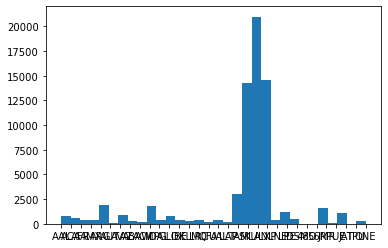

LAN    0.307715
LXP    0.213442
SKU    0.209630
TAM    0.044659
ARG    0.028531
CMP    0.027124
JMR    0.024147
LPE    0.017799
JAT    0.016054
AVA    0.012975
GLO    0.011817
AAL    0.011099
ACA    0.008284
DSM    0.007228
LNE    0.005483
IBE    0.005307
AFR    0.005249
DAL    0.005249
LRC    0.005234
AMX    0.005146
UAL    0.004912
ONE    0.004091
AZA    0.003797
KLM    0.003680
LAP    0.003211
BAW    0.003006
QFA    0.002859
AUT    0.001129
PUE    0.000718
56R    0.000249
48O    0.000147
TPU    0.000029
Name: Emp-O, dtype: float64

In [23]:
# Distribución de la aerolinea de vuelo operado
plt.hist(data['Emp-O'], data['Emp-O'].nunique())
plt.show()
#data['Emp-O'].value_counts()
data['Emp-O'].value_counts(normalize = True)

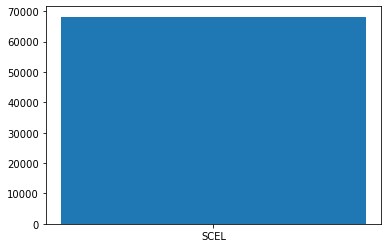

SCEL    1.0
Name: Ori-I, dtype: float64

In [24]:
# Distribución de la ciudad de origen programado
plt.hist(data['Ori-I'], data['Ori-I'].nunique())
plt.show()
#data['Ori-I'].value_counts()
data['Ori-I'].value_counts(normalize = True)

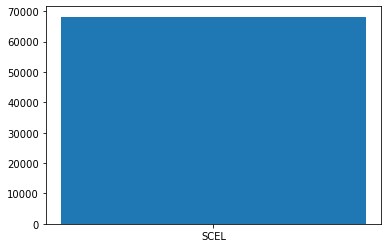

SCEL    1.0
Name: Ori-O, dtype: float64

In [25]:
# Distribución de la ciudad de origen de operación
plt.hist(data['Ori-O'], data['Ori-O'].nunique())
plt.show()
#data['Ori-O'].value_counts()
data['Ori-O'].value_counts(normalize = True)

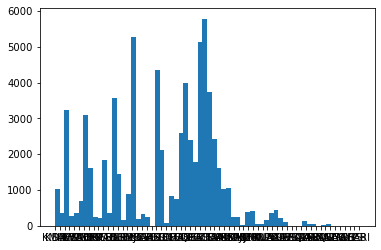

SCFA    0.084846
SPJC    0.077266
SCCF    0.075433
SCTE    0.063880
SCIE    0.058573
          ...   
SBFI    0.000015
SPSO    0.000015
SEQU    0.000015
SEQM    0.000015
SARI    0.000015
Name: Des-I, Length: 64, dtype: float64

In [26]:
# Distribución de la ciudad de destino programado
plt.hist(data['Des-I'], data['Des-I'].nunique())
plt.show()
#data['Des-I'].value_counts()
data['Des-I'].value_counts(normalize = True)

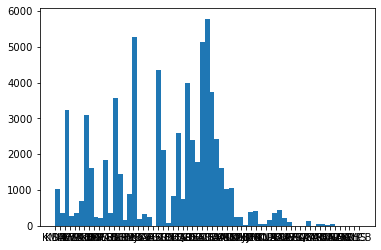

SCFA    0.084831
SPJC    0.077266
SCCF    0.075448
SCTE    0.063880
SCIE    0.058543
          ...   
SEQM    0.000029
KIAD    0.000015
SPSO    0.000015
EGYP    0.000015
SLCB    0.000015
Name: Des-O, Length: 63, dtype: float64

In [27]:
# Distribución de la ciudad de destino de operación
plt.hist(data['Des-O'], data['Des-O'].nunique())
plt.show()
#data['Des-O'].value_counts()
data['Des-O'].value_counts(normalize = True)

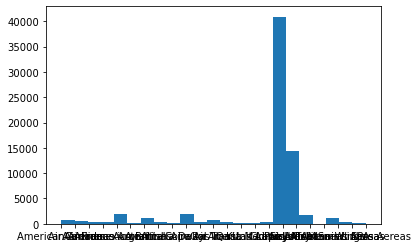

Grupo LATAM                 0.599537
Sky Airline                 0.209630
Aerolineas Argentinas       0.028575
Copa Air                    0.027124
Latin American Wings        0.024543
Avianca                     0.016890
JetSmart SPA                0.016054
Gol Trans                   0.011817
American Airlines           0.011099
Air Canada                  0.008284
Iberia                      0.005307
Delta Air                   0.005249
Air France                  0.005249
Aeromexico                  0.005146
United Airlines             0.004912
Oceanair Linhas Aereas      0.004091
Alitalia                    0.003797
K.L.M.                      0.003680
British Airways             0.003006
Qantas Airways              0.002859
Lacsa                       0.001349
Austral                     0.001085
Plus Ultra Lineas Aereas    0.000718
Name: OPERA, dtype: float64

In [28]:
# Distribución de la aerolínea que opera
plt.hist(data['OPERA'], data['OPERA'].nunique())
plt.show()
#data['OPERA'].value_counts()
data['OPERA'].value_counts(normalize = True)

## 1.4- Conclusión

### Dataset  comprende un año de vuelos, en específico el 2017.

### Destacar que solo existe una ciudad de origen del vuelo, que corresponde a Santiago, sumado a que no existe destino Santiago. Podemos concluir que el datasets solo incluye vuelos que despegan desde Santiago.
### A partir de lo anterior, podemos descartar los campos Ori-I y Ori-O porque no entregarán directamente información relevante para entrenar un modelo.

### hay diferencias de distribución entre destinos y lo mismo para aerolíneas. Por lo que podríamos filtrar según un mínimo de ocurrencias en el dataset

# 2- Generar columnas adicionales

In [29]:
# En adelante será útil, manejar las columnas de fecha, del tipo datetime.
data['Fecha-I'] = pd.to_datetime(data['Fecha-I'])  
data['Fecha-O'] = pd.to_datetime(data['Fecha-O'])  

## 2.1- Generar columna temporada_alta

In [30]:
# Generamos la nueva columna, con un valor por defecto
data['temporada_alta'] = 0

In [31]:
# Aplicas los distintos casos que una fecha es categorizada como alta 
data.loc[(data['Fecha-I'] >= '2017-12-15 00:00:00'), 'temporada_alta'] = 1
data.loc[(data['Fecha-I'] <= '2017-03-03 23:59:59'), 'temporada_alta'] = 1
data.loc[(data['Fecha-I'] >= '2017-07-15 00:00:00') & (data['Fecha-I'] <= '2017-07-31 23:59:59'), 'temporada_alta'] = 1
data.loc[(data['Fecha-I'] >= '2017-09-11 00:00:00') & (data['Fecha-I'] <= '2017-09-30 23:59:59'), 'temporada_alta'] = 1

In [32]:
# Corroboramos que se generó la nueva columna con las 2 etiquetas correctas
data['temporada_alta'].value_counts()

0    45444
1    22762
Name: temporada_alta, dtype: int64

## 2.2- Generar columna dif_min

In [33]:
# Calculamos la diferencia entre la fecha de operación y fecha programada.
data['dif_min'] = (data['Fecha-O'] - data['Fecha-I']).astype('timedelta64[m]')

In [34]:
data.head(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami,1,34.0
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami,1,-5.0
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,8,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,-5.0
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,10,1,2017,Martes,I,American Airlines,Santiago,Miami,1,40.0
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,12,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,69.0


## 2.3- Generar columna atraso_15

In [35]:
# Generamos la nueva columna, con un valor por defecto
data['atraso_15'] = 0

In [36]:
# Aplicas el criterio de tiempo de atraso mayor a 15 minutos. 
data.loc[data['dif_min'] > 15, 'atraso_15'] = 1

In [37]:
data.head(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,...,1,2017,Sabado,I,American Airlines,Santiago,Miami,1,34.0,1
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,...,1,2017,Sabado,I,American Airlines,Santiago,Miami,1,-5.0,0
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,-5.0,0
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,1,40.0,1
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,69.0,1


In [38]:
# Corroboramos que se generó la nueva columna con las 2 etiquetas correctas
data['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

## 2.4- Generar columna periodo_dia

In [39]:
# Generamos la nueva columna, con un valor por defecto
data['periodo_dia'] = ''

In [40]:
# Aplicas los distintos casos de periodo que es categorizado una hora. 
index = pd.DatetimeIndex(data['Fecha-I'])
data.loc[index.indexer_between_time('05:00', '11:59'), 'periodo_dia'] = 'mañana'
data.loc[index.indexer_between_time('12:00', '18:59'), 'periodo_dia'] = 'tarde'
data.loc[index.indexer_between_time('19:00', '04:59'), 'periodo_dia'] = 'noche'

In [41]:
# Corroboramos que se generó la nueva columna con las 3 etiquetas correctas
data['periodo_dia'].value_counts()

tarde     25506
mañana    25352
noche     17348
Name: periodo_dia, dtype: int64

## 2.5- Guardar dataframe con columnas adicionales en csv

In [42]:
data.to_csv('synthetic_features.csv')

# 3.- Buscar relaciones

In [43]:
data.apply(lambda x: x.factorize()[0]).corr()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
Fecha-I,1.000000,0.317062,NaN,0.056458,0.109620,0.998283,0.417382,NaN,0.056587,0.110799,...,0.008531,0.016325,0.020690,0.086301,NaN,0.055859,0.279768,0.069257,0.083994,0.001036
Vlo-I,0.317062,1.000000,NaN,0.219671,0.498741,0.322222,0.894218,NaN,0.220198,0.539579,...,0.017581,0.021059,-0.048713,0.401084,NaN,0.219370,-0.015004,0.062766,0.070851,-0.036546
Ori-I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Des-I,0.056458,0.219671,NaN,1.000000,0.516346,0.056241,0.218597,NaN,0.999357,0.500073,...,0.001115,-0.007424,0.593030,0.517540,NaN,0.997427,0.009422,-0.025893,-0.035866,0.134093
Emp-I,0.109620,0.498741,NaN,0.516346,1.000000,0.113276,0.452361,NaN,0.515476,0.969091,...,0.002128,0.003551,0.415020,0.971096,NaN,0.518949,-0.000578,0.006390,-0.002933,0.114902
Fecha-O,0.998283,0.322222,NaN,0.056241,0.113276,1.000000,0.419606,NaN,0.056370,0.115825,...,0.009068,0.016777,0.016872,0.089009,NaN,0.055518,0.287149,0.070840,0.085200,0.004577
Vlo-O,0.417382,0.894218,NaN,0.218597,0.452361,0.419606,1.000000,NaN,0.218910,0.484619,...,0.017435,0.021061,-0.000559,0.367460,NaN,0.218591,-0.052047,0.064010,0.073072,-0.025554
Ori-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Des-O,0.056587,0.220198,NaN,0.999357,0.515476,0.056370,0.218910,NaN,1.000000,0.499199,...,0.001128,-0.007497,0.591040,0.516821,NaN,0.998059,0.009580,-0.026040,-0.035812,0.133257
Emp-O,0.110799,0.539579,NaN,0.500073,0.969091,0.115825,0.484619,NaN,0.499199,1.000000,...,0.001535,0.004187,0.402845,0.939752,NaN,0.501762,0.004728,0.022234,0.011388,0.104721


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

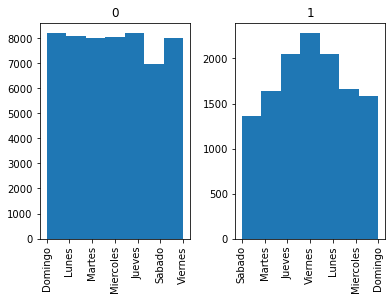

In [44]:
data.hist(column='DIANOM', by='atraso_15', bins = 7)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

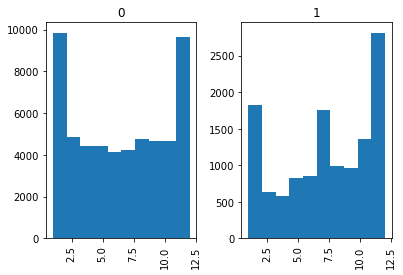

In [45]:
data.hist(column='MES', by='atraso_15')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

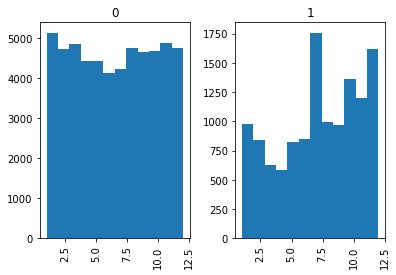

In [46]:
data.hist(column='MES', by='atraso_15', bins = 12)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

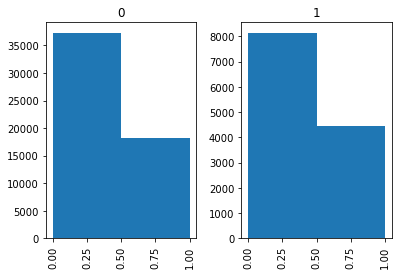

In [47]:
data.hist(column='temporada_alta', by='atraso_15', bins = 2)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

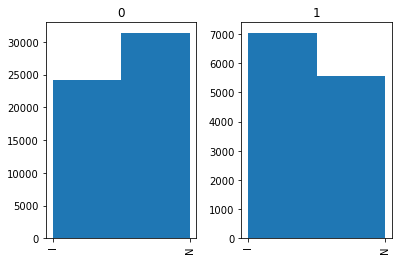

In [48]:
data.hist(column='TIPOVUELO', by='atraso_15', bins = 2)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

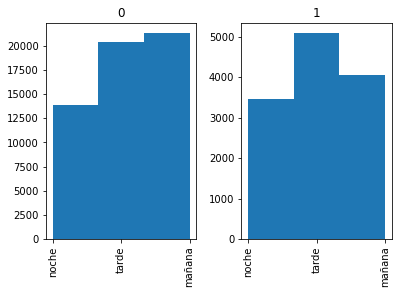

In [49]:
data.hist(column='periodo_dia', by='atraso_15', bins = 3)

# 4- Entrenamiento de modelos

## 4.1- Procesamiento de datos

In [194]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [237]:
# copio dataframe en uno nuevo que será manipulado
clean_data = data.copy()

In [238]:
clean_data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,noche


In [239]:
clean_data['TIPOVUELO_total'] = clean_data.groupby(['TIPOVUELO']).DIANOM.transform('count')

otro = clean_data[clean_data['atraso_15'] == 1].groupby(['TIPOVUELO']).size().reset_index(name='TIPOVUELO_count')
clean_data = clean_data.set_index('TIPOVUELO').join(otro.set_index('TIPOVUELO')).reset_index()

clean_data['TIPOVUELO_ratio'] = clean_data['TIPOVUELO_count'] / clean_data['TIPOVUELO_total']

In [240]:
clean_data['DIANOM_total'] = clean_data.groupby(['DIANOM']).DIANOM.transform('count')

otro = clean_data[clean_data['atraso_15'] == 1].groupby(['DIANOM']).size().reset_index(name='DIANOM_count')
clean_data = clean_data.set_index('DIANOM').join(otro.set_index('DIANOM')).reset_index()

clean_data['DIANOM_ratio'] = clean_data['DIANOM_count'] / clean_data['DIANOM_total']

In [241]:
clean_data.head(20)

,DIANOM,TIPOVUELO,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,...,temporada_alta,dif_min,atraso_15,periodo_dia,TIPOVUELO_total,TIPOVUELO_count,TIPOVUELO_ratio,DIANOM_total,DIANOM_count,DIANOM_ratio
0,Domingo,I,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,...,1,3.0,0,noche,31240,7048,0.225608,9796,1578,0.161086
1,Domingo,I,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,...,1,-5.0,0,noche,31240,7048,0.225608,9796,1578,0.161086
2,Domingo,I,2017-01-01 22:00:00,912,SCEL,KMIA,AAL,2017-01-01 22:15:00,912,SCEL,...,1,15.0,0,noche,31240,7048,0.225608,9796,1578,0.161086
3,Domingo,I,2017-01-08 22:00:00,912,SCEL,KMIA,AAL,2017-01-08 22:00:00,912,SCEL,...,1,0.0,0,noche,31240,7048,0.225608,9796,1578,0.161086
4,Domingo,I,2017-01-15 22:00:00,912,SCEL,KMIA,AAL,2017-01-15 21:59:00,912,SCEL,...,1,-1.0,0,noche,31240,7048,0.225608,9796,1578,0.161086
5,Domingo,I,2017-01-22 22:00:00,912,SCEL,KMIA,AAL,2017-01-22 21:58:00,912,SCEL,...,1,-2.0,0,noche,31240,7048,0.225608,9796,1578,0.161086
6,Domingo,I,2017-01-29 22:00:00,912,SCEL,KMIA,AAL,2017-01-29 21:50:00,912,SCEL,...,1,-10.0,0,noche,31240,7048,0.225608,9796,1578,0.161086
7,Domingo,I,2017-01-01 22:30:00,940,SCEL,KDFW,AAL,2017-01-01 22:31:00,940,SCEL,...,1,1.0,0,noche,31240,7048,0.225608,9796,1578,0.161086
8,Domingo,I,2017-01-08 22:30:00,940,SCEL,KDFW,AAL,2017-01-08 22:23:00,940,SCEL,...,1,-7.0,0,noche,31240,7048,0.225608,9796,1578,0.161086
9,Domingo,I,2017-01-15 22:30:00,940,SCEL,KDFW,AAL,2017-01-15 22:26:00,940,SCEL,...,1,-4.0,0,noche,31240,7048,0.225608,9796,1578,0.161086


In [242]:
le = preprocessing.LabelEncoder()
le.fit(clean_data['Des-I'])
clean_data['Des-I_label'] = le.transform(clean_data['Des-I'])

In [243]:
le = preprocessing.LabelEncoder()
le.fit(clean_data['Emp-I'])
clean_data['Emp-I_label'] = le.transform(clean_data['Emp-I'])

In [244]:
le = preprocessing.LabelEncoder()
le.fit(clean_data['TIPOVUELO'])
clean_data['TIPOVUELO_label'] = le.transform(clean_data['TIPOVUELO'])

In [245]:
le = preprocessing.LabelEncoder()
le.fit(clean_data['OPERA'])
clean_data['OPERA_label'] = le.transform(clean_data['OPERA'])

## 4.2 Elección de variables

### Buscamos predecir si el vuelo se atrasará, por lo que nuestro target es la variable 'atraso_15'.

In [229]:
y = clean_data[['atraso_15']].copy()

### Escogemos poruqe

In [246]:
features = ['Des-I_label', 'DIA', 'MES', 'DIANOM_ratio',
       'TIPOVUELO_ratio', 'OPERA_label', 'Emp-I_label']

In [247]:
X = clean_data[features].copy()

## 4.3- Conjunto de entrenamiento y pruebas

### Separaremos los datos entre conjunto de entrenamiento y conjunto de pruebas con el objetivo de evitar overfitting

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=324)

## 4.4a- DecisionTree

In [249]:
classifier_1 = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0, class_weight = 'balanced')
# paso los valores a entrenar
classifier_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=10,
                       random_state=0)

In [250]:
predictions_1 = classifier_1.predict(X_test)

## 4.4b- RandomForest

In [251]:
clf_rf = RandomForestClassifier(n_estimators=200, class_weight = 'balanced')
clf_rf.fit(X_train, y_train)

<ipython-input-251-37a079f85f6d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200)

In [252]:
predictions_2 = clf_rf.predict(X_test)

# 5- Evaluación de modelos 

## 5.1- DecisionTree

In [253]:
data2 = {'y_Actual':    y_test['atraso_15'].to_numpy(),
        'y_Predicted': predictions_1
        }

df2 = pd.DataFrame(data2, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df2['y_Actual'], df2['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted      0     1
Actual                
0          10821  7566
1           1926  2195


In [254]:
print('accuracy: ', accuracy_score(y_true = y_test, y_pred = predictions_1))
print('f1_score: ', f1_score(y_test, predictions_1))

accuracy:  0.5782832770570464
f1_score:  0.3162368534793258


### Explicacion deresultados

## 5.1- RandomForest

In [255]:
data2 = {'y_Actual':    y_test['atraso_15'].to_numpy(),
        'y_Predicted': predictions_2
        }

df2 = pd.DataFrame(data2, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df2['y_Actual'], df2['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted      0     1
Actual                
0          14695  3692
1           3045  1076


In [256]:
print('accuracy: ', accuracy_score(y_true = y_test, y_pred = predictions_2))
print('f1_score: ', f1_score(y_test, predictions_2))

accuracy:  0.7006842011729163
f1_score:  0.24209697378782766


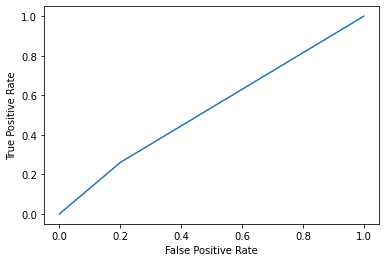

In [257]:
#Calcular metricas
fpr, tpr, _ = metrics.roc_curve(y_test['atraso_15'].to_numpy(),  predictions_2)

#Crear ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Explicacion resultados

### Para mejorar los resultados, deberíamos incorporar nuevas variables como:
### 1- Información climática del día de aterrizaje o despegue. 
### 2- Distancia entre la ciudad de origen y destino